In [1]:
%matplotlib inline

In [2]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Breast Cancer

## PCA or LDA, Random Forest vs SVM?

Breast cancer is a disease in which cells in the breast grow out of control. There are different kinds of breast cancer. The kind of breast cancer depends on which cells in the breast turn into cancer.

Breast cancer can begin in different parts of the breast. A breast is made up of three main parts: lobules, ducts, and connective tissue. The lobules are the glands that produce milk. The ducts are tubes that carry milk to the nipple. The connective tissue (which consists of fibrous and fatty tissue) surrounds and holds everything together. Most breast cancers begin in the ducts or lobules.

Breast cancer can spread outside the breast through blood vessels and lymph vessels. When breast cancer spreads to other parts of the body, it is said to have metastasized.

*We get two datasets - one from Eurostat with annual data about breast cancer cases in EU countries. Second dataset is from UCI and is well known for the many features related to the cancer cells parameters. Both datasets are totally different in the data they preserve. They are valuable in different ways, but unfortunately I can't make something third out of them. They are not compatible to be mixed, merged or looked at together. So let's explore the datasets one by one.*

**Eurostat Annual Data**

*This data is public, available on the [eurostat website](https://ec.europa.eu/eurostat/databrowser/view/HLTH_PS_SCRE$DEFAULTVIEW/default/table?lang=en).There are 963 observations with annually agregated data in percentage.*

In [3]:
bc_eurostat = pd.read_csv("data\eurostat_breast_data.csv")

In [4]:
# Let's rename and make the column names more pythonic.

bc_eurostat.columns = bc_eurostat.columns.str.lower()
bc_eurostat["last_update"] = bc_eurostat["last update"]
bc_eurostat = bc_eurostat.drop(columns = ["last update"])

In [5]:
bc_eurostat.shape

(963, 10)

In [6]:
bc_eurostat.dtypes

dataflow        object
freq            object
unit            object
source          object
icd10           object
geo             object
time_period      int64
obs_value      float64
obs_flag        object
last_update     object
dtype: object

*We see eight catagorical fields and two numeric, which is expected, due to the data contained in the table.*

In [7]:
#Let's check for missing values in the dataset

bc_eurostat.isnull().sum()

dataflow         0
freq             0
unit             0
source           0
icd10            0
geo              0
time_period      0
obs_value        0
obs_flag       649
last_update      0
dtype: int64

*Some of the fields in the column obs_flag are missing - 649. Let's explore further this field to check if this is an issue and how to address it.*

In [8]:
bc_eurostat.obs_flag.unique()

array([nan, 'b', 'd', 'e', 'dp', 'p', 'bd'], dtype=object)

*According to the documentation "obs_flag" string values correspond to - b: break in time series; d: definition differs; e: estimated; bd: break in time series, definition differs; dp: definition differs, provisional; p: provisional.
This column gives an information on the way the data has been presented.*

In [9]:
bc_eurostat.head()

,dataflow,freq,unit,source,icd10,geo,time_period,obs_value,obs_flag,last_update
0,ESTAT:HLTH_PS_SCRE(1.0),A,PC,PRG,C50,BE,2001,50.0,NaN,12/07/22 11:00:00
1,ESTAT:HLTH_PS_SCRE(1.0),A,PC,PRG,C50,BE,2002,54.0,NaN,12/07/22 11:00:00
2,ESTAT:HLTH_PS_SCRE(1.0),A,PC,PRG,C50,BE,2003,53.7,NaN,12/07/22 11:00:00
3,ESTAT:HLTH_PS_SCRE(1.0),A,PC,PRG,C50,BE,2004,55.9,NaN,12/07/22 11:00:00
4,ESTAT:HLTH_PS_SCRE(1.0),A,PC,PRG,C50,BE,2005,56.6,NaN,12/07/22 11:00:00


In [10]:
bc_eurostat.dataflow.unique(), bc_eurostat["last_update"].unique()

(array(['ESTAT:HLTH_PS_SCRE(1.0)'], dtype=object),
 array(['12/07/22 11:00:00'], dtype=object))

*The first and the last columns of Eurostat dataset doesn't tell us anything, but the name and last update of the dataset. We have one unique value per column. We will exclude them from the EDA, as we don't get useful information.*

In [11]:
bc_eurostat.freq.unique(), bc_eurostat.unit.unique()

(array(['A'], dtype=object), array(['PC'], dtype=object))

*According to documentation second and third columns tell us the data is agregated annually and measure unit is percentage.*

In [12]:
print("Unique medical diagnosis: ", bc_eurostat.icd10.unique()) 

print("List of the countires in the research ", bc_eurostat.geo.unique())
print("Number of countries is: ", len(bc_eurostat.geo.unique()))

print("Years of observations: ", bc_eurostat.time_period.unique())

Unique medical diagnosis:  ['C50' 'C53']
List of the countires in the research  ['BE' 'BG' 'CY' 'CZ' 'DE' 'DK' 'EE' 'FI' 'FR' 'HR' 'HU' 'IE' 'IS' 'IT'
 'LI' 'LT' 'LU' 'LV' 'ME' 'MK' 'MT' 'NL' 'NO' 'RO' 'RS' 'SI' 'SK' 'TR'
 'UK' 'SE' 'AT' 'CH' 'EL' 'ES' 'PL' 'PT']
Number of countries is:  36
Years of observations:  [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2000]


*The column "icd10" corresponds to medical codes for diagnosis - C50: Malignant neoplasm of breast, C53: Malignant neoplasm of cervix uteri. 
The observations include 36 european countries. Period of observations is from 2000 to 2021 inclusive.
Interesting fields are "geo" - country name, "time_period" - year and "obs_value" - calculated percentage.
Let's create some visualization to get sense of the data.*

*We can check how the figures for 2021 look like.*

In [13]:
data_2021 = bc_eurostat[bc_eurostat.time_period == 2021]
data_2021

,dataflow,freq,unit,source,icd10,geo,time_period,obs_value,obs_flag,last_update
141,ESTAT:HLTH_PS_SCRE(1.0),A,PC,PRG,C50,HR,2021,56.0,NaN,12/07/22 11:00:00
238,ESTAT:HLTH_PS_SCRE(1.0),A,PC,PRG,C50,LT,2021,45.5,p,12/07/22 11:00:00
272,ESTAT:HLTH_PS_SCRE(1.0),A,PC,PRG,C50,LV,2021,30.8,NaN,12/07/22 11:00:00
289,ESTAT:HLTH_PS_SCRE(1.0),A,PC,PRG,C50,MT,2021,77.8,NaN,12/07/22 11:00:00
332,ESTAT:HLTH_PS_SCRE(1.0),A,PC,PRG,C50,NO,2021,65.5,NaN,12/07/22 11:00:00
343,ESTAT:HLTH_PS_SCRE(1.0),A,PC,PRG,C50,RS,2021,5.2,NaN,12/07/22 11:00:00
355,ESTAT:HLTH_PS_SCRE(1.0),A,PC,PRG,C50,SI,2021,77.2,NaN,12/07/22 11:00:00
561,ESTAT:HLTH_PS_SCRE(1.0),A,PC,PRG,C53,LT,2021,53.5,dp,12/07/22 11:00:00
582,ESTAT:HLTH_PS_SCRE(1.0),A,PC,PRG,C53,LV,2021,35.1,NaN,12/07/22 11:00:00
596,ESTAT:HLTH_PS_SCRE(1.0),A,PC,PRG,C53,MT,2021,23.5,d,12/07/22 11:00:00


*We observe non-unique values in column "geo", which gives us a hard time to uncover what the data could show us for 2021.
Let's make it more suitable for our goal by unmelting column "icd10".*

In [14]:
tidy_2021 = data_2021.pivot(columns = "icd10", index = "geo", values = "obs_value")
tidy_2021

icd10,C50,C53
geo,,
HR,56.0,NaN
LT,45.5,53.5
LV,30.8,35.1
MT,77.8,23.5
NO,65.5,NaN
RS,5.2,5.6
SI,77.2,71.7


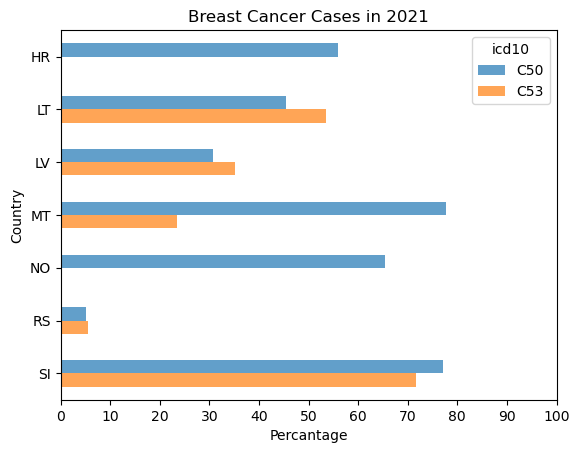

In [15]:
tidy_2021.plot.barh(alpha = 0.7)

plt.title("Breast Cancer Cases in 2021")
plt.xlabel("Percantage")
plt.ylabel("Country")
plt.xticks(range(0, 110, 10))
plt.yticks(range(0, 7), tidy_2021.index)
plt.gca().invert_yaxis()
plt.show()

*Just 7 countries are presented in the 2021 data out of 36. Slovenia shows very high number of Breast Cancer - above 70%, while Serbia is on the bottom with under 10%. However we should mind the different ways in different countries the data has been collected.*

**Bulgaria Numbers**

*We are interested only in Bulgaria breast cancer cases. What is the situation historically and if there is a trend that could reveals more. We assume bouth sources of information (source: PRG, SRV) are equally reliable, so we will aggregate our data by country, year and diagnosis.*

In [16]:
bc_eurostat.source.unique()

array(['PRG', 'SRV'], dtype=object)

**Functions creation**

*First function provides the data in the suitable size and format. Second function plots visuals to see the numbers.*

In [17]:
def get_cntry_cases(dataset, geo_name, icd10_name):
    """
    The function scrunch the numbers by grouping a given dataset by country name, diagnosis and year.
    It filters for specific country and diagnosis. 
    """
        
    dataset = dataset[(dataset.geo == geo_name)
                     & (dataset.icd10 == icd10_name)]
    result = dataset.groupby(by = ["geo", "icd10", "time_period"])["obs_value"].mean().round(0)
    return result

In [18]:
def plot_cases_yearly(x1, y1, x2, y2, xticks, title):
    """ 
    This is a function for plotting Breast Cancer Cases per Year.
    We are using grouped bar chart.
    x1, y1 - correspond to data for icd10 = C50
    x2, y2 - correspond to data for icd10 = C53
    """
    
    width = 0.4
    plt.figure(figsize = (8, 6))

    plt.bar(x1 - 0.2, y1, width, alpha = 0.7, label = "C50")
    plt.bar(x2 + 0.2, y2, width, alpha = 0.7, label = "C53")

    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Percentage")
    plt.xticks(xticks)
    plt.yticks(range(0, 110, 10))
    plt.legend()
    plt.show()

In [19]:
# We are interested only in data for Bulgaria. And separately data for both diagnosis.

bg_C50 = get_cntry_cases(bc_eurostat, "BG", "C50")
bg_C53 = get_cntry_cases(bc_eurostat, "BG", "C53")
bg_C50, bg_C53

(geo  icd10  time_period
 BG   C50    2008           22.0
             2014           32.0
             2015           14.0
             2016           21.0
             2017           21.0
             2019           36.0
 Name: obs_value, dtype: float64,
 geo  icd10  time_period
 BG   C53    2008           47.0
             2014           52.0
             2015            9.0
             2016           34.0
             2017           13.0
             2019           57.0
 Name: obs_value, dtype: float64)

In [20]:
bg_years_list_C50 = bg_C50.index.get_level_values(2)
bg_years_list_C53 = bg_C53.index.get_level_values(2)
bg_years_list_C50, bg_years_list_C50

(Int64Index([2008, 2014, 2015, 2016, 2017, 2019], dtype='int64', name='time_period'),
 Int64Index([2008, 2014, 2015, 2016, 2017, 2019], dtype='int64', name='time_period'))

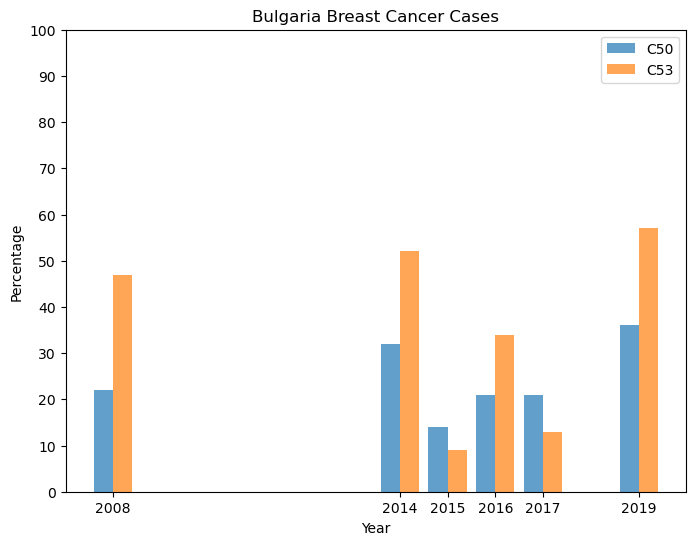

In [21]:
plot_cases_yearly(bg_years_list_C50, bg_C50, bg_years_list_C53, bg_C53, bg_years_list_C50, "Bulgaria Breast Cancer Cases")

*It is hard to analyze what we see, so let's try to compare it with something "similar".
From EU countries Slovakia is with number of population close to the Bulgarian one. According to wikipedia - 5.4 millions in 2021. And 6.5 millions for Bulgaria. Let's check the figures in Slovakia to better understand the situation in Bulgaria.*

**Slovakia Numbers**

In [22]:
# Slovakia data extraction

sk_C50 = get_cntry_cases(bc_eurostat, "SK", "C50")
sk_C53 = get_cntry_cases(bc_eurostat, "SK", "C53")
sk_C50, sk_C53

(geo  icd10  time_period
 SK   C50    2006           29.0
             2007           32.0
             2008           34.0
             2009           47.0
             2010           33.0
             2011           31.0
             2012           32.0
             2013           31.0
             2014           42.0
             2015           30.0
             2016           31.0
             2017           31.0
             2018           30.0
             2019           42.0
             2020           27.0
 Name: obs_value, dtype: float64,
 geo  icd10  time_period
 SK   C53    2009           56.0
             2010           49.0
             2011           48.0
             2012           47.0
             2013           47.0
             2014           58.0
             2015           48.0
             2016           46.0
             2017           46.0
             2018           46.0
             2019           59.0
             2020           40.0
 Name: obs_value, dtype: 

In [23]:
sk_years_list_C50 = sk_C50.index.get_level_values(2)
sk_years_list_C53 = sk_C53.index.get_level_values(2)
sk_years_list_C50, sk_years_list_C50

(Int64Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
             2017, 2018, 2019, 2020],
            dtype='int64', name='time_period'),
 Int64Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
             2017, 2018, 2019, 2020],
            dtype='int64', name='time_period'))

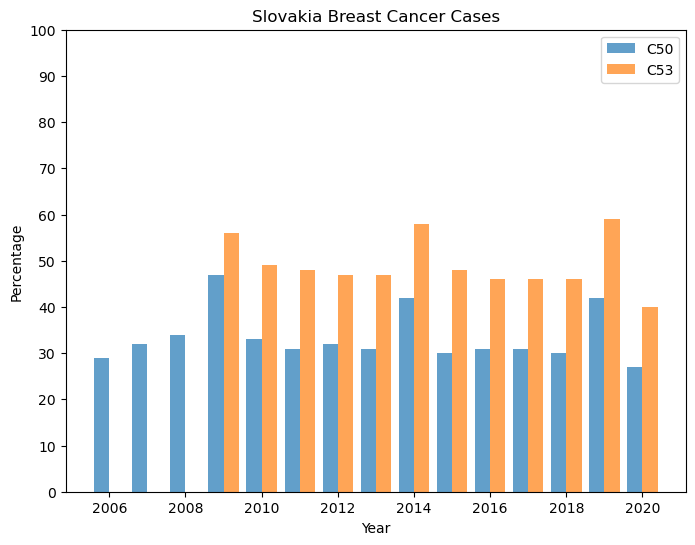

In [24]:
plot_cases_yearly(sk_years_list_C50, sk_C50, sk_years_list_C53, sk_C53, range(2006, 2021, 2), "Slovakia Breast Cancer Cases")

**Conclusion**

*Bulgaria data is not fully presented. There is a gap in data between 2009 and 2013, as well 2018. It is hard to see any trend or pattern. Unlike Slovakia there are cases of C50 that exceeds C53 in two years - 2015 and 2017. The numbers in those two years are significantly lower than the rest, which may point to a bias. Unfortunately the original data is already agregated and is not compatible for further exploration on this matter.*

**Table Winsconsin explorations**

In [25]:
bc_winsconsin = pd.read_csv("data\wdbc.data", header = None)

In [26]:
bc_winsconsin.shape

(569, 32)

In [27]:
col_names_winsc = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"]

In [28]:
bc_winsconsin.columns = col_names_winsc

In [29]:
bc_winsconsin.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
bc_winsconsin.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [31]:
bc_winsconsin.diagnosis.unique()

array(['M', 'B'], dtype=object)